## Training with TPrime_600GeV_&_tth, VH, VBF, GGH_As_ background
>This is the training of signal and bacgrund to get the output as a HDF5 file. The output file futher used to test on the TPrime at 1200GeV as signal.


Here, The input files are Signal with Tprime and background file used here are ttgg. Both have been used with the same number of input varaibles.'dipho_pt','dipho_phi', 'dipho_eta','dipho_e','dipho_mass','dipho_leadPt', 'dipho_leadEt','dipho_leadEta','dipho_leadPhi', 'dipho_subleadEta','bjet1_pt','bjet2_pt','bjet1_eta', 'bjet2_eta', 'jet1_pt','jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi', 'bjet3_phi', 'bjet1_discr','bjet2_discr', 'bjet3_discr', 'jet3_pt', 'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e'.

In [1]:
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.22/00


## Import the datasets

>Import all the signal and the backgrounds 
 * Signals 
     signal_TPrime_600 = /eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root
        

In [2]:
signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_01= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_02 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VBFHToGG_M125_13TeV_amcatnlo_pythia8.root'
back_03 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_04 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_THQ_ctcvcp_HToGG_M125_13TeV-madgraph-pythia8.root'
back_05= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

In [3]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_back_05 = "tagsDumper/trees/ggh_125_13TeV_THQLeptonicTag"
treeName_back_04 = "tagsDumper/trees/thq_125_13TeV_THQLeptonicTag"
treeName_back_03 = "tagsDumper/trees/vh_125_13TeV_THQLeptonicTag"
treeName_back_02 = 'tagsDumper/trees/vbf_125_13TeV_THQLeptonicTag'
treeName_back_01 = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"


In [4]:
columns = ['dipho_leadPt',
             'dipho_mass',
             'dipho_leadEta',
             'dipho_subleadEta',
             'dipho_leadIDMVA',
             'dipho_subleadIDMVA',
             'dipho_lead_haspixelseed',
             'dipho_sublead_haspixelseed',
             'n_jets',
             'n_bjets',
             'n_centraljets',
             'lepton_charge',
             'lepton_leadPt',
             'lepton_leadEta',
             'fwdjet1_pt',
             'fwdjet1_eta',
             'fwdjet1_discr',
             'top_mt',
             'dr_tHchainfwdjet',
             'dr_leptonbjet',
             'dr_leptonfwdjet',
             'dr_bjetfwdjet',
             'dr_leadphofwdjet',
             'dr_subleadphofwdjet',
             'bjet1_pt',
             'bjet2_pt',
             'bjet3_pt',
             'bjet1_eta',
             'bjet2_eta',
             'bjet3_eta',
             'bjet1_discr',
             'bjet2_discr',
             'bjet3_discr',
             'jet1_pt',
             'jet2_pt',
             'jet3_pt',
             'jet1_eta',
             'jet2_eta',
             'jet3_eta',
             'jet1_discr',
             'jet2_discr',
             'jet3_discr']
             

In [5]:
signal_Tprime600 = root2array(signal, treeName_signal, columns)   #Signal TPrime at 600TeV
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_tth = root2array(back_01, treeName_back_01, columns)      
back_vbf = root2array(back_02, treeName_back_02, columns)
back_vh = root2array(back_03, treeName_back_03, columns)
back_thq = root2array(back_04, treeName_back_04, columns)
back_ggh = root2array(back_05, treeName_back_05, columns)


In [6]:
signal_Tprime600 = pd.DataFrame(signal_Tprime600)            #Signal for the testing
back_tth = pd.DataFrame(back_tth)          #tth background dataframe 
back_vbf = pd.DataFrame(back_vbf)             #vbf background dataframe 
back_vh = pd.DataFrame(back_vh)             #vh background dataframe 
back_thq = pd.DataFrame(back_thq) #thq background dataframe 
back_ggh = pd.DataFrame(back_ggh) #ggh background dataframe 
back_ttgg = pd.DataFrame(back_ttgg)

In [10]:
signal_Tprime600.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,199.472260,126.641273,0.084015,1.195149,0.957987,0.687579,0.0,0.0,3.0,1.0,...,-999.0,84.649239,74.393456,32.669273,-0.487586,-3.465604,-2.688962,0.542797,-2.000000,-2.0
1,217.392303,124.014992,-0.121357,-0.101361,0.872169,0.967785,0.0,0.0,2.0,1.0,...,-999.0,112.434402,84.011833,-999.000000,0.293124,2.278897,-999.000000,0.638937,0.721447,-999.0
2,121.089691,123.836288,0.842742,1.373165,0.888976,0.919611,0.0,0.0,4.0,1.0,...,-999.0,91.825996,62.056263,38.143219,3.149675,-3.128838,4.403498,-2.000000,-2.000000,-2.0
3,158.326920,122.239555,0.202652,0.260665,0.956062,0.762749,0.0,0.0,2.0,1.0,...,-999.0,87.551056,85.922279,-999.000000,1.111560,2.848130,-999.000000,0.991427,-2.000000,-999.0
4,139.716736,123.026970,0.194240,0.534833,0.163151,0.361930,0.0,0.0,4.0,1.0,...,-999.0,177.258102,169.389847,27.921988,-0.204870,0.046312,-2.416145,0.998264,0.043448,-2.0


In [11]:
signal_Tprime600.shape

(81013, 42)

In [12]:
len(signal_Tprime600)

81013

In [15]:
signal_Tprime600.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81013 entries, 0 to 81012
Data columns (total 42 columns):
dipho_leadPt                  81013 non-null float32
dipho_mass                    81013 non-null float32
dipho_leadEta                 81013 non-null float32
dipho_subleadEta              81013 non-null float32
dipho_leadIDMVA               81013 non-null float32
dipho_subleadIDMVA            81013 non-null float32
dipho_lead_haspixelseed       81013 non-null float32
dipho_sublead_haspixelseed    81013 non-null float32
n_jets                        81013 non-null float32
n_bjets                       81013 non-null float32
n_centraljets                 81013 non-null float32
lepton_charge                 81013 non-null float32
lepton_leadPt                 81013 non-null float32
lepton_leadEta                81013 non-null float32
fwdjet1_pt                    81013 non-null float32
fwdjet1_eta                   81013 non-null float32
fwdjet1_discr                 81013 non-nul

In [16]:
assert signal_Tprime600.isnull().sum().sum() == 0

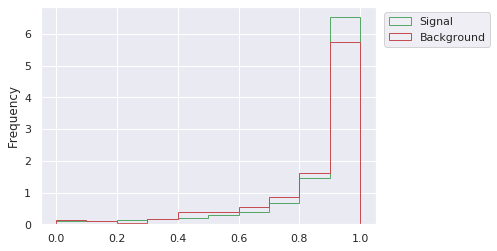

In [18]:
low_high=(0,1)
signal_Tprime600['dipho_leadIDMVA'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_ggh['dipho_leadIDMVA'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


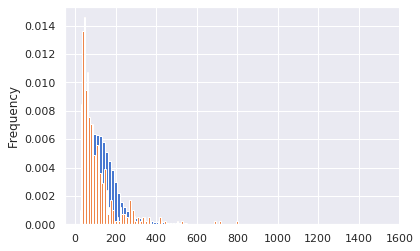

In [20]:
signal_Tprime600['jet1_pt'].plot.hist(bins=100, density = True)
back_ggh['jet1_pt'].plot.hist(bins=100, density = True)

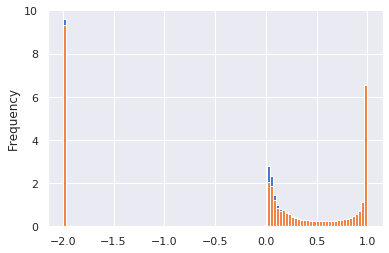

In [26]:
signal_Tprime600['jet2_discr'].plot.hist(bins=100, density = True)
back_thq['jet2_discr'].plot.hist(bins=100, density = True)

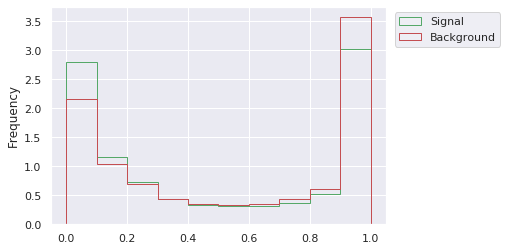

In [25]:
low_high=(0,1)
signal_Tprime600['jet2_discr'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_thq['jet2_discr'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


In [27]:
signal = signal_Tprime600
backgr = pd.concat((back_tth, back_ggh, back_vbf, back_vh, back_ttgg), axis=0)

In [28]:
X = np.concatenate((signal_Tprime600, backgr))
y = np.concatenate((np.ones(signal_Tprime600.shape[0]),
                    np.zeros(backgr.shape[0])))

In [29]:
X.shape, y.shape

((239154, 42), (239154,))

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)


In [31]:
X_train.shape, y_train.shape

((160233, 42), (160233,))

In [32]:
X_test.shape, y_test.shape

((78921, 42), (78921,))

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant

In [45]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (30,)))
# clf.add(Dropout(3))
clf.add(Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.3))
clf.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(32, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [24]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience =  10, mode = "auto", baseline = None)
# fit model
history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1)
# evaluate the model

Train on 112163 samples, validate on 48070 samples
Epoch 1/100
112163/112163 [==============================] - 4s 35us/step - loss: 1.5349 - acc: 0.7126 - val_loss: 1.3643 - val_acc: 0.8068
Epoch 2/100
112163/112163 [==============================] - 2s 17us/step - loss: 1.3303 - acc: 0.8074 - val_loss: 1.2484 - val_acc: 0.8371
Epoch 3/100
112163/112163 [==============================] - 2s 17us/step - loss: 1.1963 - acc: 0.8356 - val_loss: 1.1213 - val_acc: 0.8505
Epoch 4/100
112163/112163 [==============================] - 2s 19us/step - loss: 1.0843 - acc: 0.8430 - val_loss: 1.0128 - val_acc: 0.8532
Epoch 5/100
112163/112163 [==============================] - 2s 19us/step - loss: 0.9850 - acc: 0.8480 - val_loss: 0.9185 - val_acc: 0.8568
Epoch 6/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.8985 - acc: 0.8529 - val_loss: 0.8404 - val_acc: 0.8570
Epoch 7/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.8224 - acc: 0.8532 - val_

Epoch 59/100
112163/112163 [==============================] - 2s 17us/step - loss: 0.3033 - acc: 0.8767 - val_loss: 0.3253 - val_acc: 0.8686
Epoch 60/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3032 - acc: 0.8762 - val_loss: 0.3168 - val_acc: 0.8710
Epoch 61/100
112163/112163 [==============================] - 2s 19us/step - loss: 0.3029 - acc: 0.8771 - val_loss: 0.3213 - val_acc: 0.8678
Epoch 62/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3017 - acc: 0.8769 - val_loss: 0.3172 - val_acc: 0.8700
Epoch 63/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3022 - acc: 0.8778 - val_loss: 0.3181 - val_acc: 0.8707
Epoch 64/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3012 - acc: 0.8772 - val_loss: 0.3191 - val_acc: 0.8694
Epoch 65/100
112163/112163 [==============================] - 2s 18us/step - loss: 0.3016 - acc: 0.8778 - val_loss: 0.3162 - val_acc: 0.8704
Epoch 66/100


2022-02-25 07:50:47.973320: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [25]:
# Final evaluation of the model for DNN
# Testing Outputs"$\pm$"
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.07%


In [26]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.31%


In [27]:
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 17.6 µs


In [28]:
import h5py

# hf.create_dataset('dataset_1', h)

In [29]:
from keras.models import model_from_json
model_json = clf.to_json()
with open("model(with all(except_thq) as background and TPrime_600 signal_train).json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
clf.save_weights("model(with all(except_thq) as background and TPrime_600 signal_train).h5")
print("saved trained model with combined background and a signal to disk")

saved trained model with combined background and a signal to disk


In [30]:
# load json and create model
json_file = open('model(with all(except_thq) as background and TPrime_600 signal_train).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model(with all(except_thq) as background and TPrime_600 signal_train).h5")
print("Loaded model from disk")

Loaded model from disk


In [31]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

78921/78921 [==============================] - 4s 51us/step


In [32]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, y_test, verbose=0)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))

It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 87.07%


In [33]:
print(X_test.shape)
print(y_test.shape)

(78921, 30)
(78921,)


In [34]:
# Load Testing dataset
signal_0 = signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_0 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
signal_Tprime1200 = root2array(signal_0, treeName_signal_0, columns)   #Signal TPrime at 600TeV

In [35]:
signal_Tprime1200 = pd.DataFrame(signal_Tprime1200)

In [36]:

signal_Tprime1200.head()

,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet3_phi,bjet3_eta,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,595.166260,0.460952,0.627633,727.120056,125.027214,534.582397,534.582397,0.566175,0.515456,0.996379,...,-999.000000,-999.000000,0.985339,0.819623,-999.000000,90.022743,1.954158,312.403442,561.495178,1378.422119
1,456.524109,-0.984099,-0.670740,576.773621,124.728577,287.602081,287.602081,-0.733117,-1.179360,-0.519446,...,1.728448,0.157884,0.999983,0.505706,0.254300,60.414616,-2.950332,162.035049,365.411346,389.538452
2,474.975677,0.836109,-0.724698,617.692627,123.324104,246.845337,246.845337,-0.460441,0.874362,-0.968103,...,-999.000000,-999.000000,0.999494,-999.000000,-999.000000,-999.000000,-999.000000,304.269562,49.994984,-999.000000
3,587.216736,-2.157246,-0.240816,617.103760,124.927475,530.529053,530.529053,-0.195753,-2.096326,-0.550637,...,-999.000000,-999.000000,0.998836,-999.000000,-999.000000,29.110281,2.931939,320.741150,4055.874268,240.681366
4,458.509705,-2.259718,0.607091,559.567932,124.109444,421.636475,421.636475,0.551736,-2.339284,0.886035,...,0.880687,-2.398130,0.999373,0.948760,0.173882,103.105125,0.585539,708.648315,189.009872,861.765381


In [37]:
signal_Tprime1200.shape

(107628, 30)

In [38]:
y_test.shape

(78921,)

In [39]:
df = signal_Tprime1200.loc[:78920].copy()

In [40]:
df.shape

(78921, 30)

In [41]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(df, y_test)

78921/78921 [==============================] - 4s 53us/step


In [42]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(df, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 56.89%


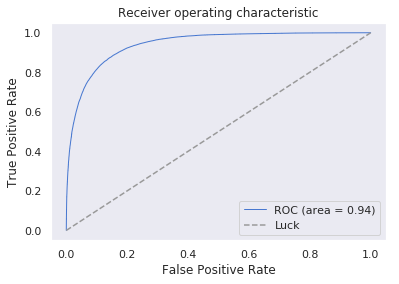

In [43]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

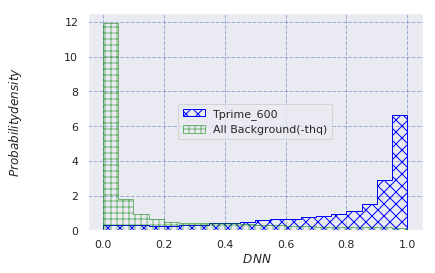

In [44]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background(-thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''output_TPrime_ttgg.png')
plt.show()

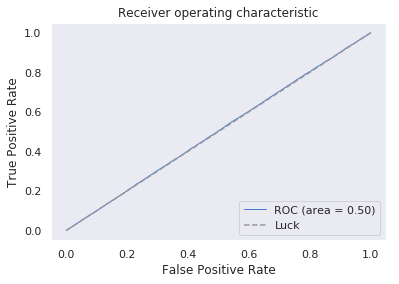

In [45]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(df)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

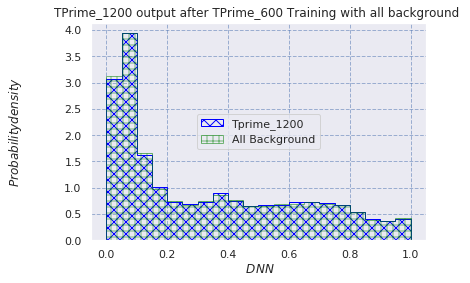

In [46]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(df)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

# Other Way

In [47]:
X_1 = np.concatenate((signal_Tprime1200, backgr))
y_1 = np.concatenate((np.ones(signal_Tprime1200.shape[0]),
                    np.zeros(backgr.shape[0])))

In [48]:
y_1.shape

(265769,)

In [49]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state =5)


In [50]:
X_1_train.shape


(178065, 30)

In [51]:
X_1_test.shape

(87704, 30)

In [52]:
y_1_test.shape

(87704,)

In [53]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

87704/87704 [==============================] - 5s 52us/step


In [54]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_1_test, y_1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.44%


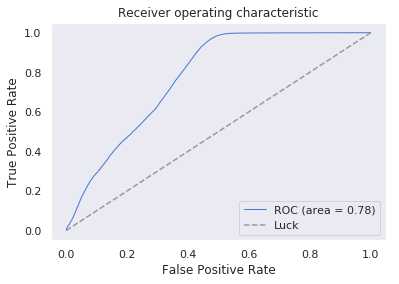

In [55]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

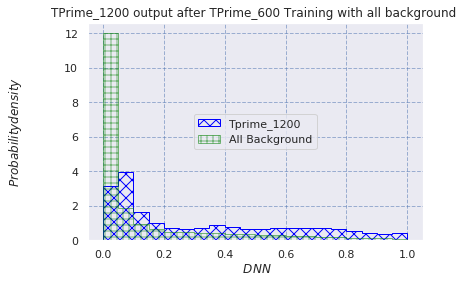

In [56]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_1_test==0]
tSig = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

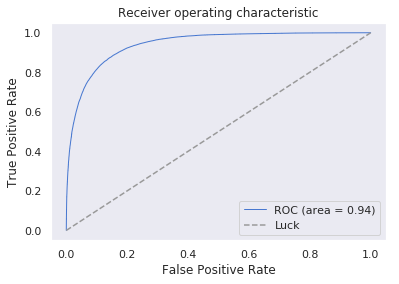

In [58]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

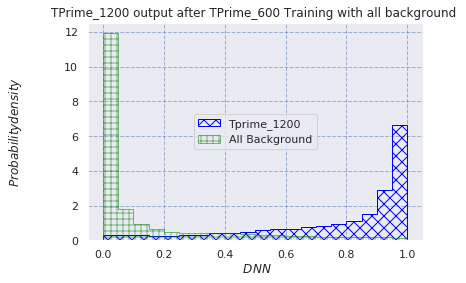

In [59]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_test==0]
tSig_1 = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [ ]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [ ]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_five_background_test_excpet_thq_with_TPrime1200.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg:
    h_bak.Fill(i)
for j in tSig:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

Here, The output from the Ist method is not as good as the 2nd one.